In [131]:
import pandas as pd 
import numpy as np
import seaborn as snas
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
concrete_df=pd.read_excel(r'C:\Users\Manas\Downloads\2nd Term\Interview\Concrete compressive strength\Concrete_Data.xlsx')

#### How big is the data

In [133]:
concrete_df.shape

(1030, 9)

#### How does the data look like

In [134]:
concrete_df.sample(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
380,475.00,0.00,59.00,142.00,1.90,1098.00,641.00,28,57.226508
984,154.80,0.00,142.80,193.30,9.10,877.20,867.70,28,9.738159
624,307.00,0.00,0.00,193.00,0.00,968.00,812.00,28,27.530777
385,520.00,0.00,0.00,170.00,5.20,855.00,855.00,28,60.280887
593,252.50,0.00,0.00,185.70,0.00,1111.60,784.30,7,11.483912
387,520.00,0.00,0.00,175.00,5.20,870.00,805.00,28,51.021224
613,277.00,0.00,0.00,191.00,0.00,968.00,856.00,3,11.362564
356,277.19,97.82,24.46,160.70,11.19,1061.70,782.46,28,63.142212
721,310.00,0.00,0.00,192.00,0.00,1012.00,830.00,3,11.852092
320,249.10,0.00,98.75,158.11,12.80,987.76,889.01,14,28.682202


####  Each row represents a specific concrete mixture, and the columns represent different components and properties of the concrete. 

#### what are the data types in the dataset

In [135]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

#### In summary, this DataFrame contains information about different components of concrete mixtures and their corresponding quantities, as well as additional data such as the age of the concrete and its compressive strength. It can be used for further analysis and modeling related to concrete properties and performance.

#### Now, let's Check for missing values and duplicate values.

In [136]:
concrete_df.duplicated().sum()

25

#### This shows we have 25 duplicate rows we need to  drop from our analysis.

In [137]:
concrete_df=concrete_df.drop_duplicates()

In [138]:
concrete_df.shape

(1005, 9)

In [139]:
concrete_df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

#### Hence, there are no missing values.

#### Basic numerical description of the data.

In [140]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1005.0,278.629055,104.345003,102.000000,190.680000,265.000000,349.00000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1005.0,72.043134,86.170555,0.000000,0.000000,20.000000,142.50000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1005.0,55.535075,64.207448,0.000000,0.000000,0.000000,118.27000,200.100000
Water (component 4)(kg in a m^3 mixture),1005.0,182.074378,21.340740,121.750000,166.610000,185.700000,192.94000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1005.0,6.031647,5.919559,0.000000,0.000000,6.100000,10.00000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1005.0,974.376468,77.579534,801.000000,932.000000,968.000000,1031.00000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1005.0,772.686617,80.339851,594.000000,724.300000,780.000000,822.20000,992.600000
Age (day),1005.0,45.856716,63.734692,1.000000,7.000000,28.000000,56.00000,365.000000
"Concrete compressive strength(MPa, megapascals)",1005.0,35.250273,16.284808,2.331808,23.523542,33.798114,44.86834,82.599225


#### Check the correlaion between all the features wrt the target variable.

In [141]:
concrete_df.corr().T

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly Ash (component 3)(kg in a m^3 mixture),-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water (component 4)(kg in a m^3 mixture),-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer (component 5)(kg in a m^3 mixture),0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age (day),0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
"Concrete compressive strength(MPa, megapascals)",0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


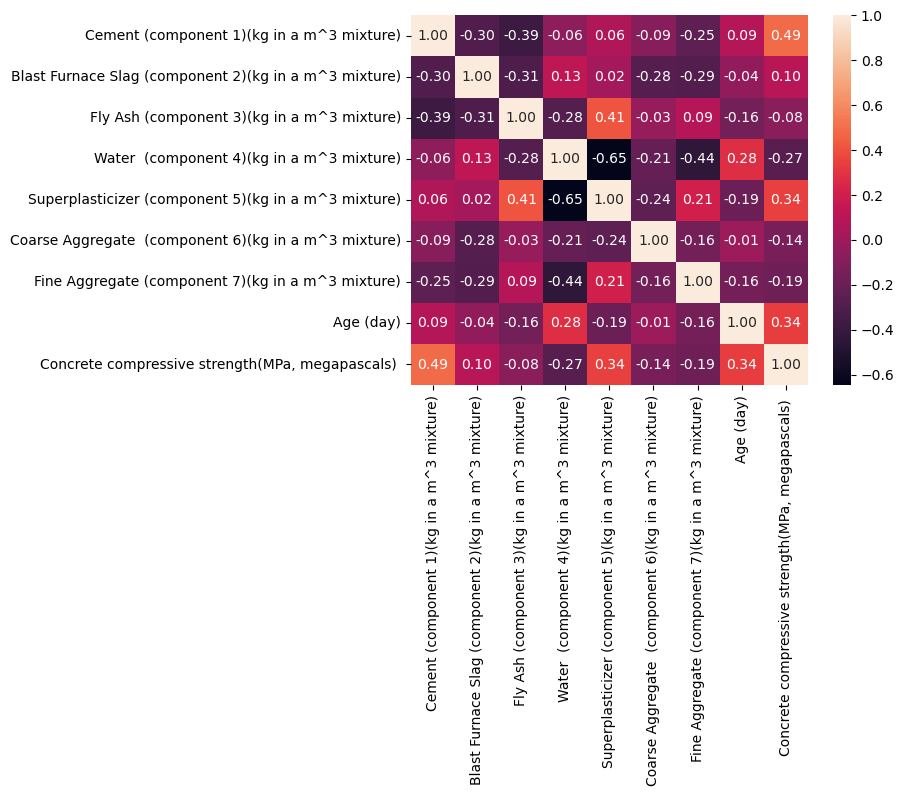

<Figure size 800x1000 with 0 Axes>

In [142]:
sns.heatmap(concrete_df.corr(),annot=True,fmt='0.2f')
plt.figure(figsize=(8,10))
plt.show()

## Exploratory Data Analysis

#### Before going forward, let's change the column names for ease of pandas dataframe handling


In [143]:
concrete_df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [144]:
new_column={'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast furnace Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)' :'Fly Ash' ,
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)' : 'Age',
       'Concrete compressive strength(MPa, megapascals) ':'compressive strength'}

In [145]:
df=concrete_df.rename(columns=new_column)
df

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


## Univariate Analysis

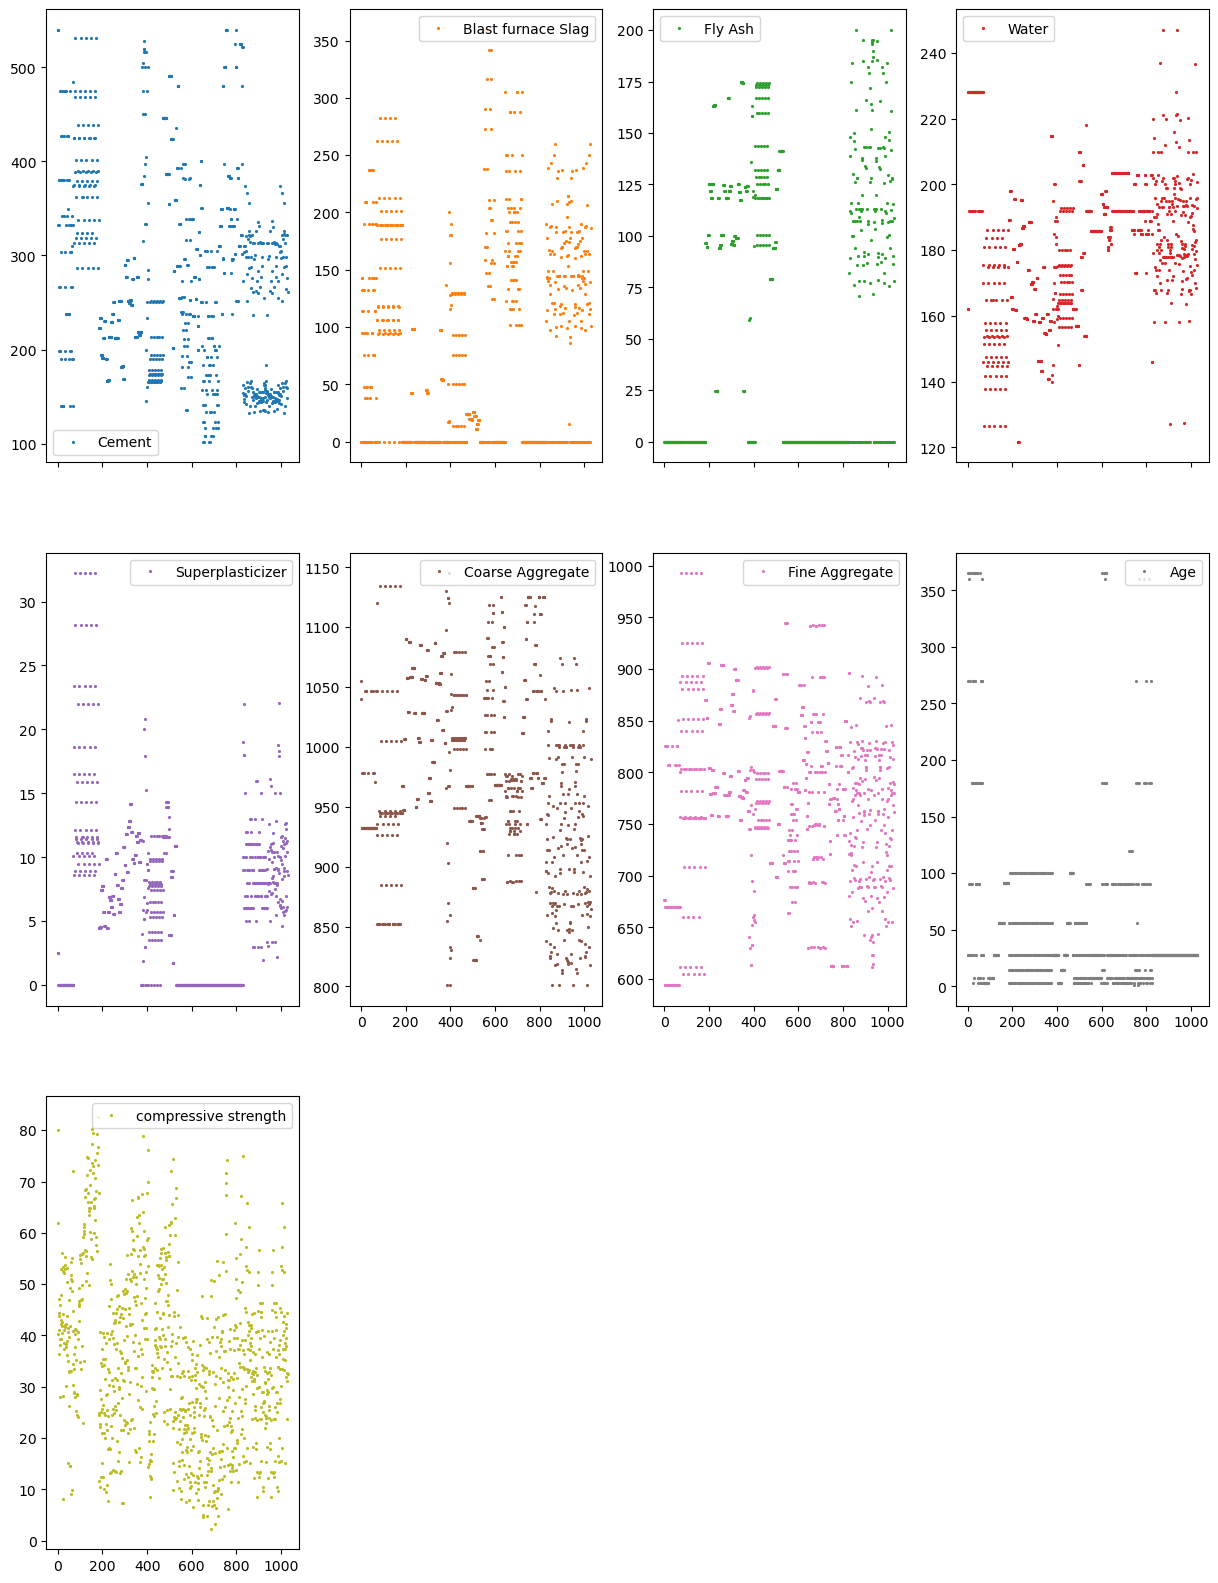

In [146]:
##Basic understanding of numerical data

df.plot(lw=0,marker='.',subplots=True,layout=(-1,4),figsize=(15,20),markersize=2.5)
plt.show()

### This does not give much clarity about data. Let's deep dive further.

## Cement

In [147]:
df.columns

Index(['Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'compressive strength'],
      dtype='object')

In [148]:
## No of unique values in Cement
df['Cement'].nunique()

280

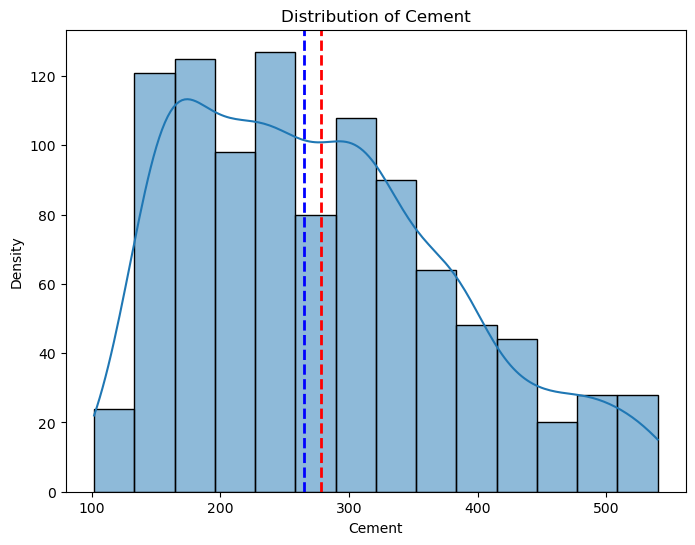

In [149]:
# Histogram of 'Cement'
plt.figure(figsize=(8, 6))
sns.histplot(df['Cement'], kde=True)
plt.xlabel('Cement')
plt.ylabel('Density')
plt.title('Distribution of Cement')


# Add vertical lines for mean and median
plt.axvline(df['Cement'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Cement'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


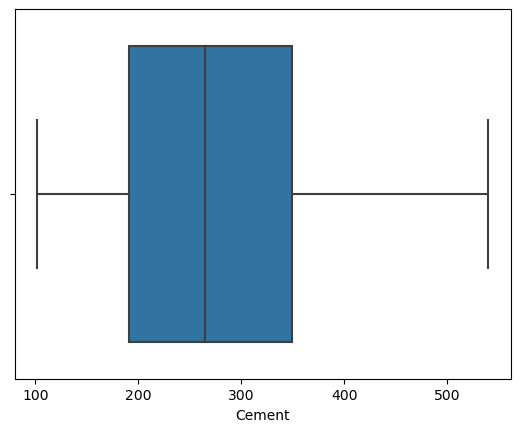

In [150]:
sns.boxplot(df['Cement'])
plt.show()

In [151]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Cement'].quantile(0.25)
q2 = df['Cement'].quantile(0.5)
q3 = df['Cement'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  -46.79999999999998 or any value above 586.48


In [152]:
df['Cement'].describe()

count    1005.000000
mean      278.629055
std       104.345003
min       102.000000
25%       190.680000
50%       265.000000
75%       349.000000
max       540.000000
Name: Cement, dtype: float64

### There are clearly no outliers.

In [153]:
df.columns

Index(['Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'compressive strength'],
      dtype='object')

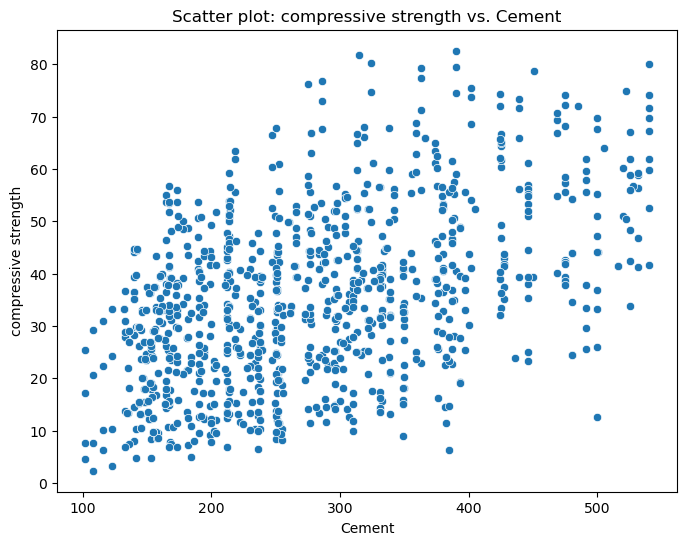

In [154]:
# Scatter plot of 'Cement' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Cement'], y=df['compressive strength'])
plt.xlabel('Cement')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs. Cement')
plt.show()

### There seems to be a positive linear relationship between Cement and compressive strength

In [155]:
df['Cement'].corr(df['compressive strength']) ## Correlation Coefficient 

0.48828306801652677

## Blast furnace Slag

In [156]:
df['Blast furnace Slag'].nunique()

187

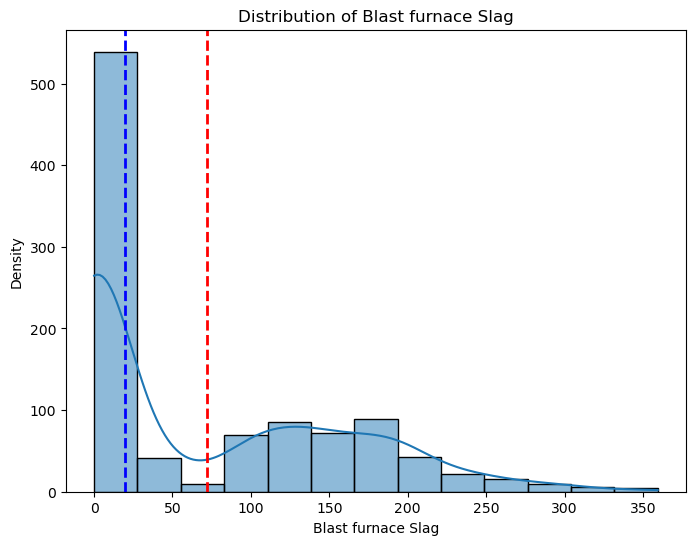

In [157]:
# Histogram of 'Blast furnace Slag'
plt.figure(figsize=(8, 6))
sns.histplot(df['Blast furnace Slag'], kde=True)
plt.xlabel('Blast furnace Slag')
plt.ylabel('Density')
plt.title('Distribution of Blast furnace Slag')


# Add vertical lines for mean and median
plt.axvline(df['Blast furnace Slag'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Blast furnace Slag'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


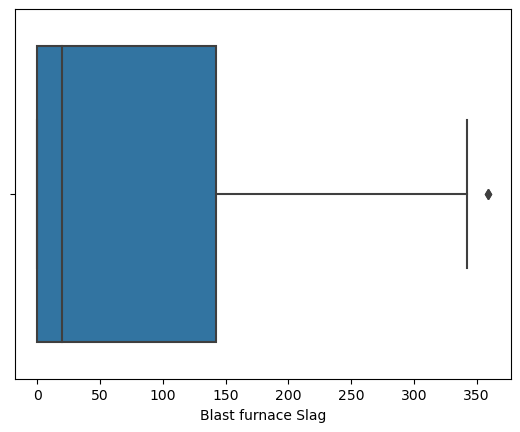

In [158]:
## Boxplot of Blast furnace Slag
sns.boxplot(df['Blast furnace Slag'])
plt.show()

In [159]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Blast furnace Slag'].quantile(0.25)
q2 = df['Blast furnace Slag'].quantile(0.5)
q3 = df['Blast furnace Slag'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)


Possible outlier's would any value below  -213.75 or any value above 356.25


In [160]:
df[df['Blast furnace Slag']>whisker_upper]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.422359
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.435269


### There seems to be two extreme values. We will not remove as of now . We will take that decision after the complete analysis.

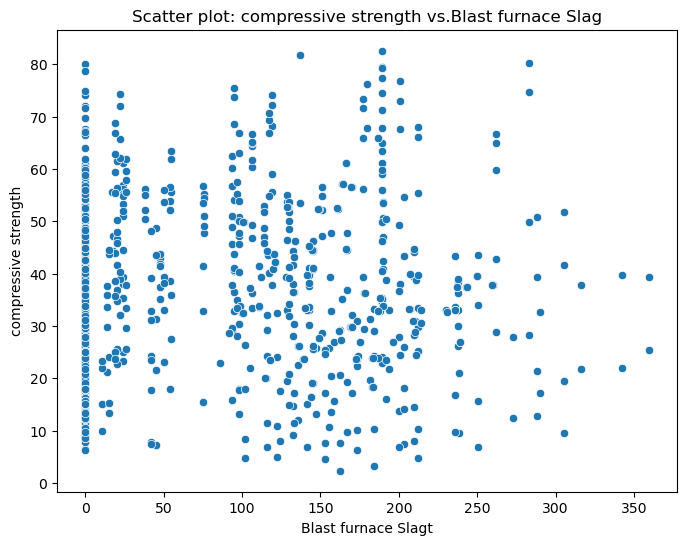

In [161]:
# Scatter plot of 'Blast furnace Slag' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Blast furnace Slag'], y=df['compressive strength'])
plt.xlabel('Blast furnace Slagt')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs.Blast furnace Slag')
plt.show()

### There seems to be no particular linear relationship between Blast furnace Slag and compressive strength

In [162]:
df['Blast furnace Slag'].corr(df['compressive strength']) ## Correlation coefficient.

0.10337039529981937

## Fly Ash

In [163]:
df['Fly Ash'].nunique()

163

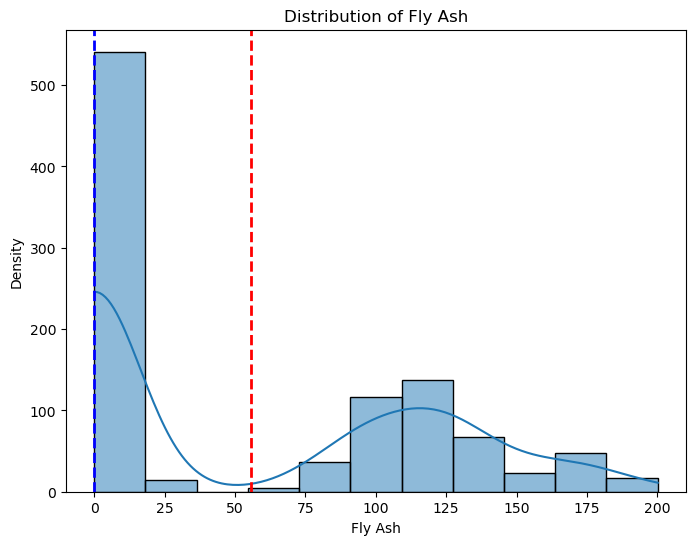

In [164]:
# Histogram of 'Fly Ash'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fly Ash'], kde=True)
plt.xlabel('Fly Ash')
plt.ylabel('Density')
plt.title('Distribution of Fly Ash')


# Add vertical lines for mean and median
plt.axvline(df['Fly Ash'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Fly Ash'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


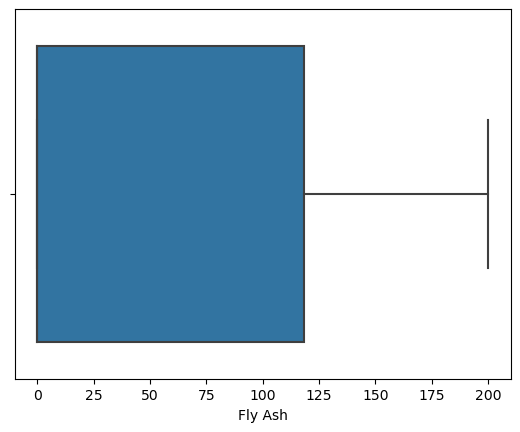

In [165]:
## Boxplot of Fly Ash
sns.boxplot(df['Fly Ash'])
plt.show()

In [166]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Fly Ash'].quantile(0.25)
q2 = df['Fly Ash'].quantile(0.5)
q3 = df['Fly Ash'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  -177.405 or any value above 295.675


In [167]:
df['Fly Ash'].describe()

count    1005.000000
mean       55.535075
std        64.207448
min         0.000000
25%         0.000000
50%         0.000000
75%       118.270000
max       200.100000
Name: Fly Ash, dtype: float64

### Thus, there are clearly no outliers.

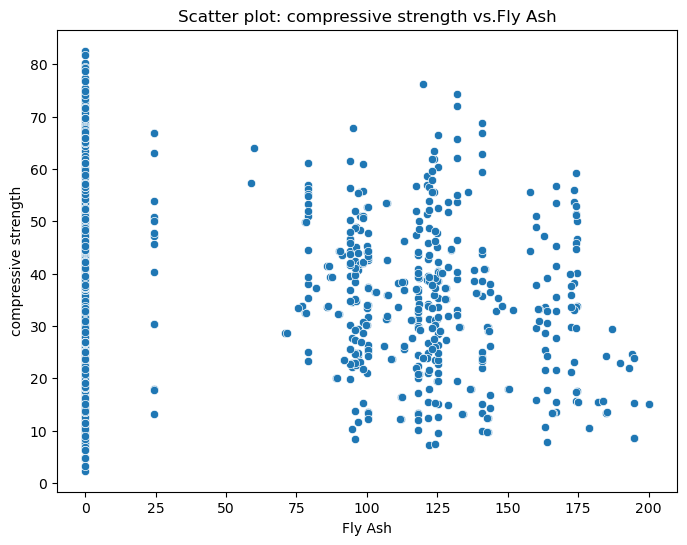

In [168]:
# Scatter plot of 'Fly Ash' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Fly Ash'], y=df['compressive strength'])
plt.xlabel('Fly Ash')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs.Fly Ash')
plt.show()

### There seems to be no clear linear relationship between Fly Ash and Compressive Strength

In [169]:
df['Fly Ash'].corr(df['compressive strength']) ## correlation coefficient

-0.0806475967617497

## Water

In [170]:
df['Water'].nunique()

205

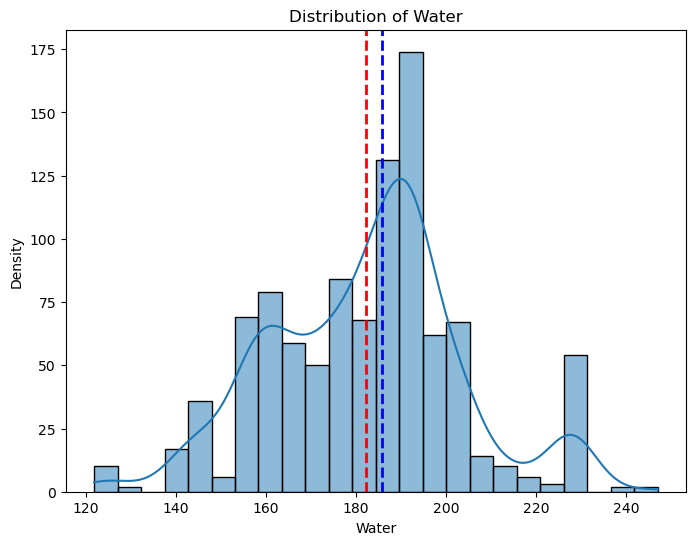

In [171]:
# Histogram of 'Water'
plt.figure(figsize=(8, 6))
sns.histplot(df['Water'], kde=True)
plt.xlabel('Water')
plt.ylabel('Density')
plt.title('Distribution of Water')


# Add vertical lines for mean and median
plt.axvline(df['Water'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Water'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


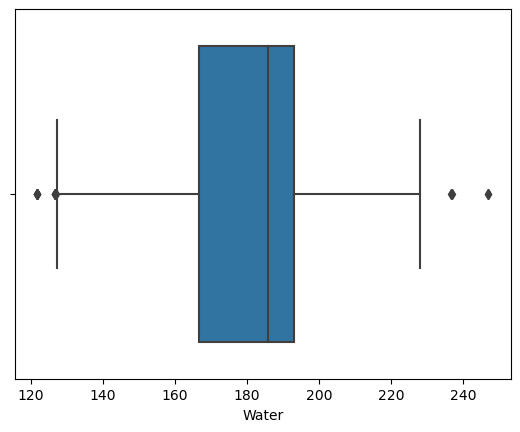

In [172]:
## Boxplot of Fly Ash
sns.boxplot(df['Water'])
plt.show()

In [173]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Water'].quantile(0.25)
q2 = df['Water'].quantile(0.5)
q3 = df['Water'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  127.11500000000004 or any value above 232.43499999999997


In [174]:
df[(df['Water'] < whisker_lower) | (df['Water'] > whisker_upper)]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
74,375.00,93.80,0.00,126.60,23.40,852.1,992.60,3,28.999361
97,375.00,93.80,0.00,126.60,23.40,852.1,992.60,7,45.698469
120,375.00,93.80,0.00,126.60,23.40,852.1,992.60,28,56.695611
143,375.00,93.80,0.00,126.60,23.40,852.1,992.60,56,60.198150
166,375.00,93.80,0.00,126.60,23.40,852.1,992.60,91,62.500999
224,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,3,7.749710
225,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,14,17.822955
226,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,28,24.241976
227,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,56,32.853531
228,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,100,39.231184


In [175]:
df[(df['Water'] < whisker_lower) | (df['Water'] > whisker_upper)].groupby('Cement')['Age'].value_counts()

Cement  Age
139.70  28     1
140.00  28     1
167.95  3      1
        14     1
        28     1
        56     1
        100    1
236.90  28     1
237.00  28     1
313.00  28     1
375.00  3      1
        7      1
        28     1
        56     1
        91     1
Name: Age, dtype: int64

### There seems to be ouliers, but we will not remove it now.  We will check these after complete analysis of other variables

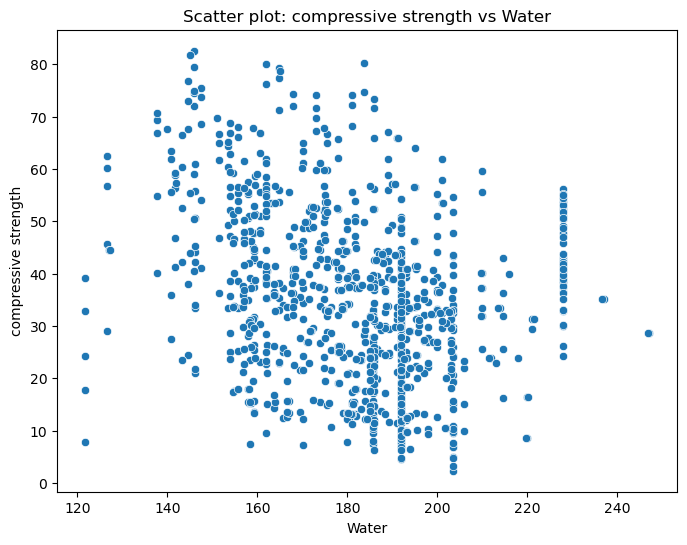

In [95]:
# Scatter plot of 'Water' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Water'], y=df['compressive strength'])
plt.xlabel('Water')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Water')
plt.show()

### There seems to be slight negative relationship between water and compressive strength

In [96]:
df['Water'].corr(df['compressive strength']) 

-0.2696060330766604

## Superplasticizer

In [98]:
df['Superplasticizer'].nunique()

155

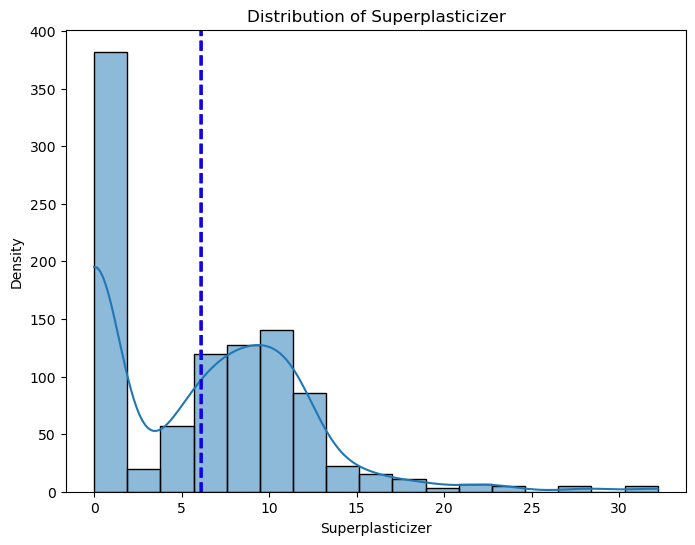

In [103]:
# Histogram of 'Superplasticizer'
plt.figure(figsize=(8, 6))
sns.histplot(df['Superplasticizer'], kde=True)
plt.xlabel('Superplasticizer')
plt.ylabel('Density')
plt.title('Distribution of Superplasticizer')


# Add vertical lines for mean and median
plt.axvline(df['Superplasticizer'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Superplasticizer'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


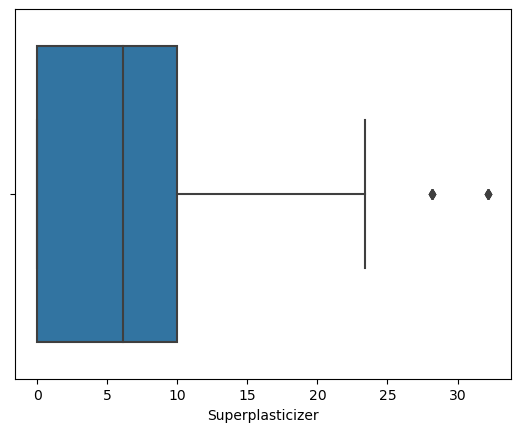

In [104]:
## Boxplot of Fly Ash
sns.boxplot(df['Superplasticizer'])
plt.show()

In [105]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Superplasticizer'].quantile(0.25)
q2 = df['Superplasticizer'].quantile(0.5)
q3 = df['Superplasticizer'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  -15.0 or any value above 25.0


In [107]:
df[(df['Superplasticizer']<whisker_lower) | (df['Superplasticizer']>whisker_upper)]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.196451
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.299612
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.896079
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.898158
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.899856
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.399137
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.299233
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.798513
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.698869
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.198409


In [109]:
df[(df['Superplasticizer']<whisker_lower) | (df['Superplasticizer']>whisker_upper)].groupby('Cement')['Age'].value_counts()

Cement  Age
469.0   3      1
        7      1
        28     1
        56     1
        91     1
531.3   3      1
        7      1
        28     1
        56     1
        91     1
Name: Age, dtype: int64

In [ ]:
### In essence there are two instances of concrete which slightly higher value.

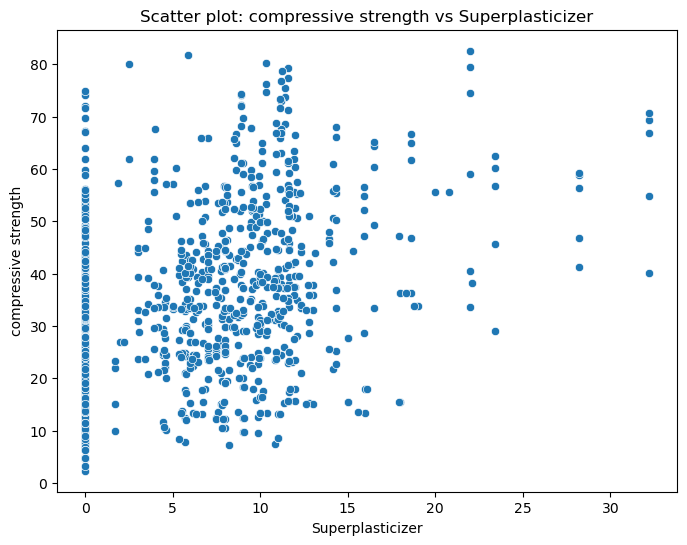

In [106]:
# Scatter plot of 'Superplasticizer' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Superplasticizer'], y=df['compressive strength'])
plt.xlabel('Superplasticizer')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Superplasticizer')
plt.show()

### There is a slight positive linear correlation between Superplasticizer and compressive stength

In [180]:
df['Superplasticizer'].corr(df['compressive strength'])


0.34422525706315216

## Coarse Aggregate

In [178]:
df['Coarse Aggregate'].nunique()

284

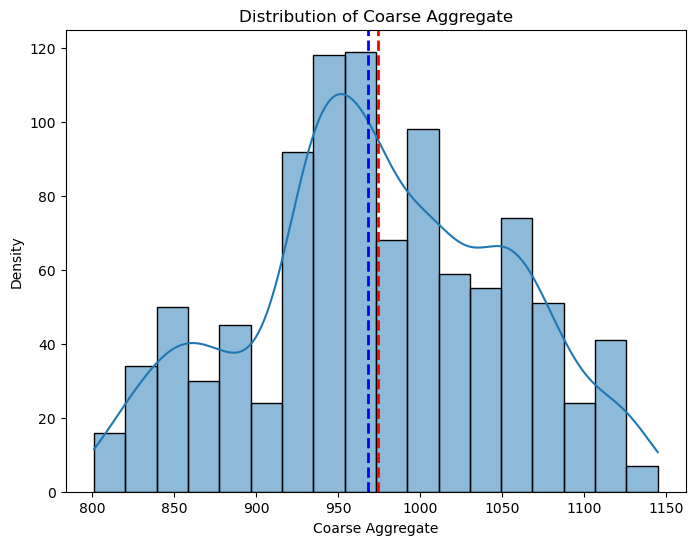

In [181]:
# Histogram of 'Coarse Aggregate'
plt.figure(figsize=(8, 6))
sns.histplot(df['Coarse Aggregate'], kde=True)
plt.xlabel('Coarse Aggregate')
plt.ylabel('Density')
plt.title('Distribution of Coarse Aggregate')


# Add vertical lines for mean and median
plt.axvline(df['Coarse Aggregate'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Coarse Aggregate'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


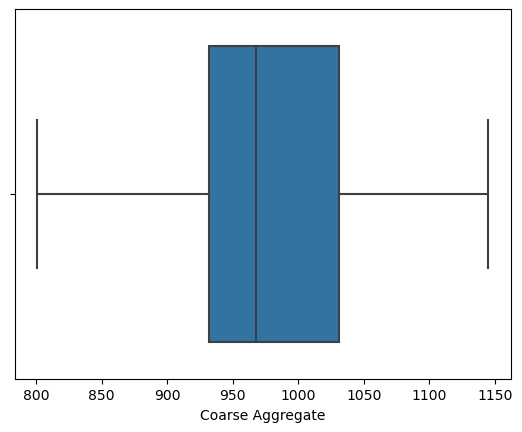

In [182]:
## Boxplot of Coarse Aggregate
sns.boxplot(df['Coarse Aggregate'])
plt.show()

In [183]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Coarse Aggregate'].quantile(0.25)
q2 = df['Coarse Aggregate'].quantile(0.5)
q3 = df['Coarse Aggregate'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  783.5 or any value above 1179.5


In [184]:
df['Coarse Aggregate'].describe()

count    1005.000000
mean      974.376468
std        77.579534
min       801.000000
25%       932.000000
50%       968.000000
75%      1031.000000
max      1145.000000
Name: Coarse Aggregate, dtype: float64

### Clearly, there are no outlier's 

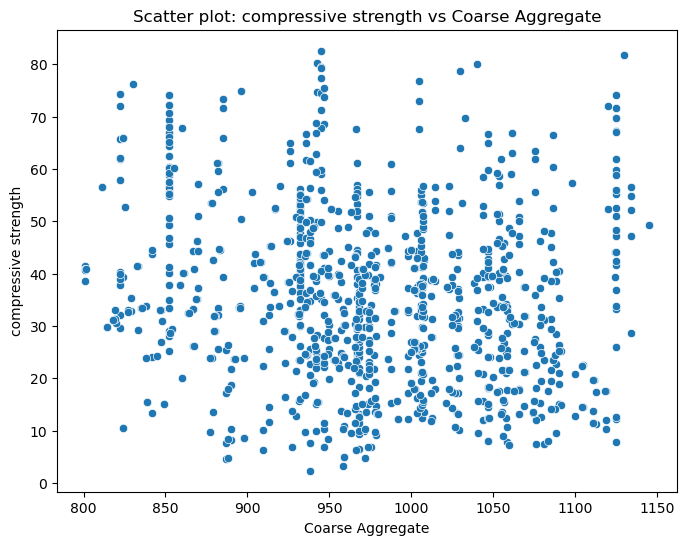

In [179]:
# Scatter plot of 'Coarse Aggregate' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Coarse Aggregate'], y=df['compressive strength'])
plt.xlabel('Coarse Aggregate')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Coarse Aggregate')
plt.show()

### There seems to be no linear positive relationship between Course Aggregate and compressive strength.

In [185]:
df['Coarse Aggregate'].corr(df['compressive strength'])

-0.14471025498116508

In [186]:
df.columns

Index(['Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'compressive strength'],
      dtype='object')

## Fine Aggregate 

In [189]:
df['Fine Aggregate'].nunique()

304

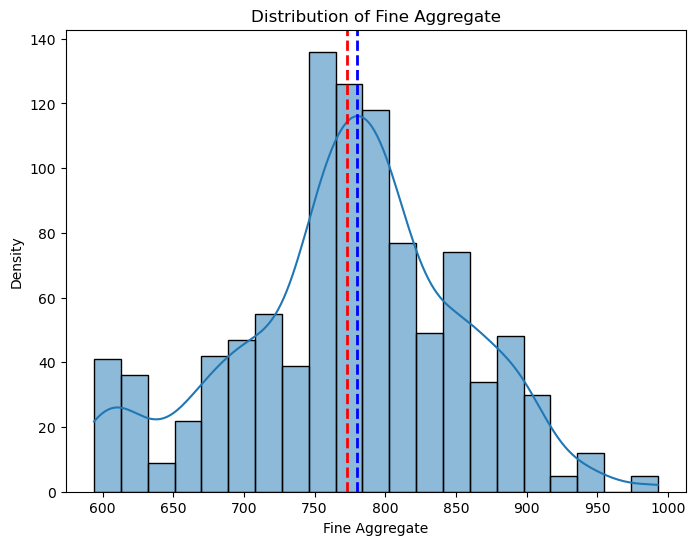

In [190]:
# Histogram of 'Fine Aggregate'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fine Aggregate'], kde=True)
plt.xlabel('Fine Aggregate')
plt.ylabel('Density')
plt.title('Distribution of Fine Aggregate')


# Add vertical lines for mean and median
plt.axvline(df['Fine Aggregate'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Fine Aggregate'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


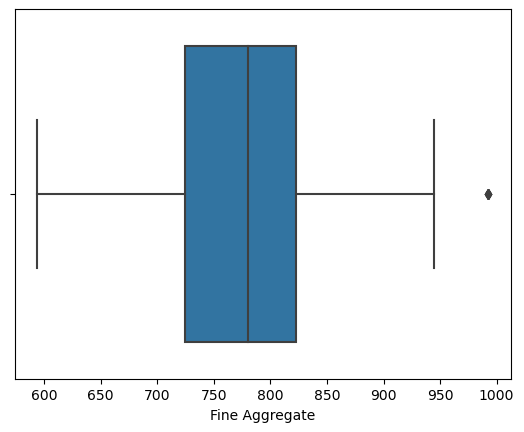

In [191]:
## Boxplot of Fine Aggregate
sns.boxplot(df['Fine Aggregate'])
plt.show()

In [195]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Fine Aggregate'].quantile(0.25)
q2 = df['Fine Aggregate'].quantile(0.5)
q3 = df['Fine Aggregate'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  577.4499999999998 or any value above 969.0500000000002


In [198]:
df[(df['Fine Aggregate']<whisker_lower) | (df['Fine Aggregate']>whisker_upper)].groupby('Cement')['Age'].value_counts()

Cement  Age
375.0   3      1
        7      1
        28     1
        56     1
        91     1
Name: Age, dtype: int64

In [214]:
df[(df['Fine Aggregate']<whisker_lower) | (df['Fine Aggregate']>whisker_upper)]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,28.999361
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.698469
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.695611
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.198150
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.500999


### In essence there is one cube which is an outlier.

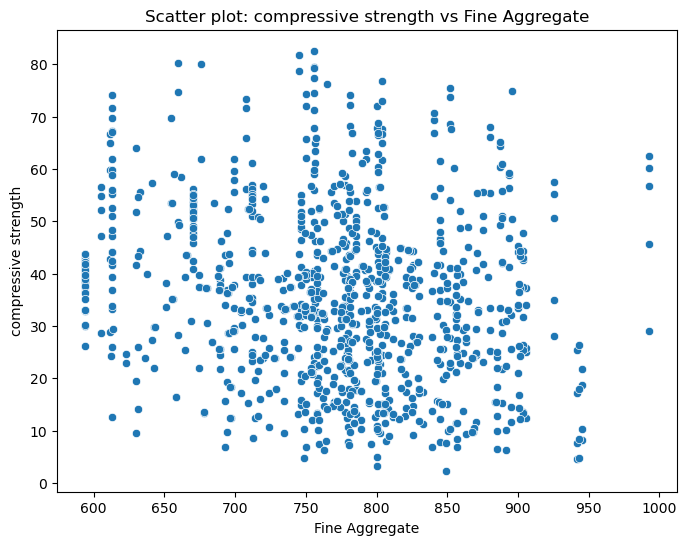

In [199]:
# Scatter plot of 'Fine Aggregate' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Fine Aggregate'], y=df['compressive strength'])
plt.xlabel('Fine Aggregate')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Fine Aggregate')
plt.show()

### There seems to be no clear relationship between Fine Aggregate and compressive strength

In [200]:
df['Fine Aggregate'].corr(df['compressive strength'])

-0.1864572019828923

## Age

In [203]:
df['Age'].nunique()

14

In [204]:
df['Age'].value_counts()

28     419
3      129
7      122
56      86
14      62
90      54
100     52
180     26
91      17
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

In [206]:
df[df["Age"]==1]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
746,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,12.638095
763,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1,6.267337


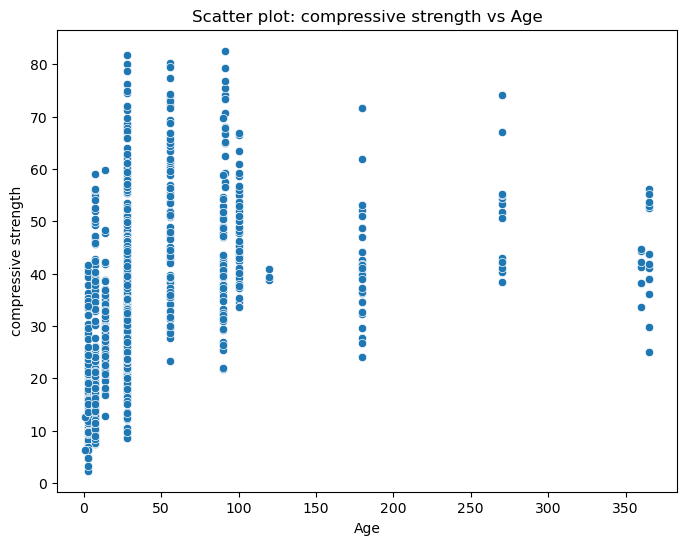

In [212]:
# Scatter plot of 'Age' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['compressive strength'])
plt.xlabel('Age')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Age')
plt.show()

### As age increases , compressive strength also increases.

In [213]:
df['Age'].corr(df['compressive strength'])

0.3373706323483089

## Target Variable - compressive strength

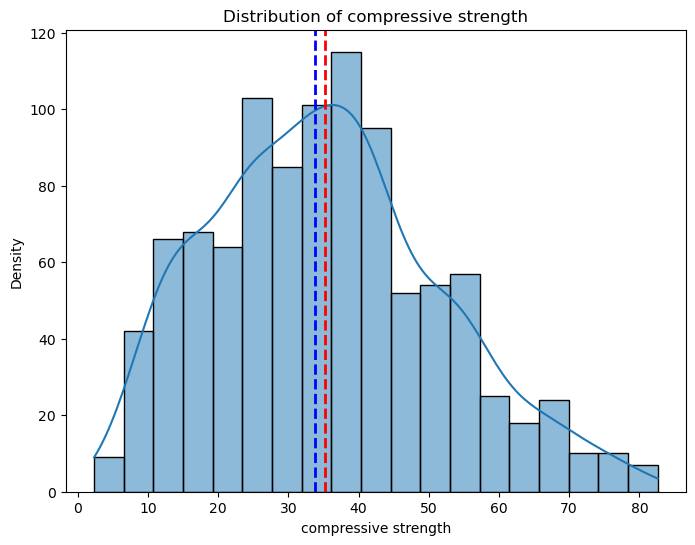

In [215]:
# Histogram of 'compressive strength'
plt.figure(figsize=(8, 6))
sns.histplot(df['compressive strength'], kde=True)
plt.xlabel('compressive strength')
plt.ylabel('Density')
plt.title('Distribution of compressive strength')


# Add vertical lines for mean and median
plt.axvline(df['compressive strength'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['compressive strength'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

In [216]:
## Features 

X=df.drop('compressive strength',axis=1)

In [217]:
## Target

y=df['compressive strength']

In [218]:
## Train Test Split 

from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [220]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)